In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv')

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [5]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

<AxesSubplot:>

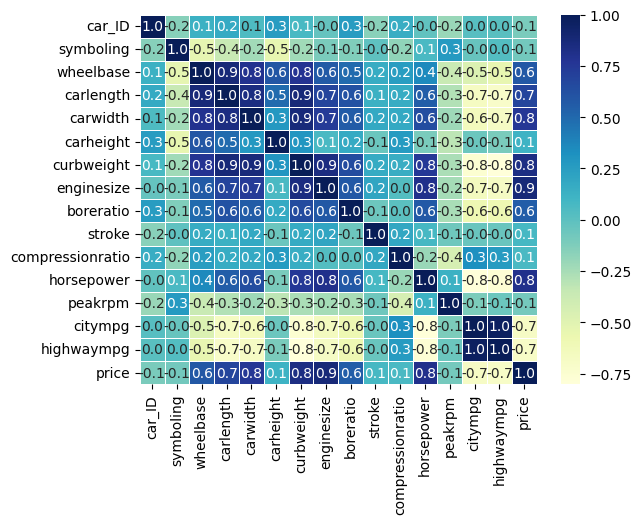

In [6]:
sns.heatmap(df.corr(), annot = True, linewidth = 0.5, fmt = '0.1f', cmap = 'YlGnBu')

In [7]:
#price is corelated to wheelbase(0.6), carlength(0.7), carwidth(0.8), curbweigth(0.8), enginesize(0.9), boreratio(0.6), horsepower(0.8), citypg(-0.7), highwaympg(-0.7).

<AxesSubplot:xlabel='enginesize', ylabel='price'>

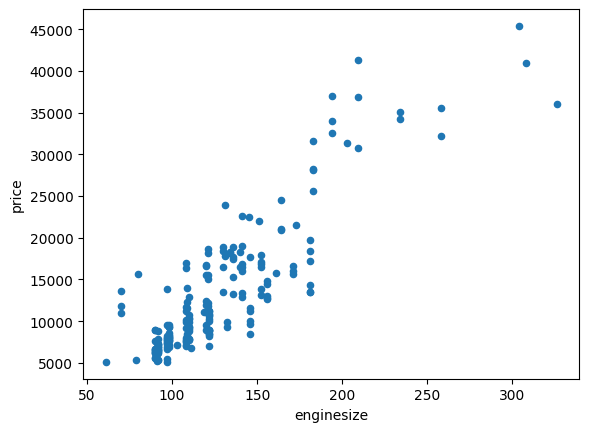

In [8]:
df.plot(kind='scatter',x = 'enginesize', y ='price')

<AxesSubplot:xlabel='carwidth', ylabel='price'>

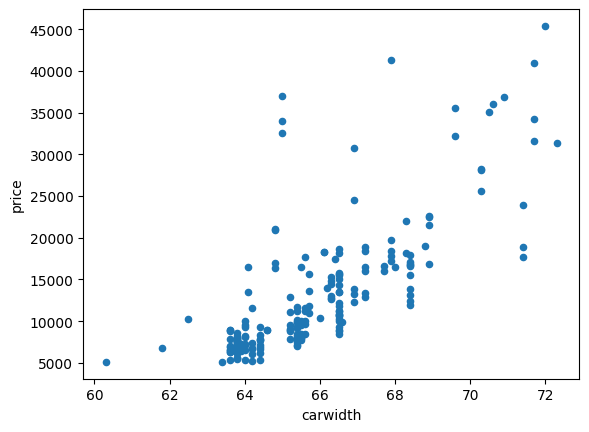

In [9]:
df.plot(kind='scatter',x = 'carwidth', y ='price')

<AxesSubplot:xlabel='horsepower', ylabel='price'>

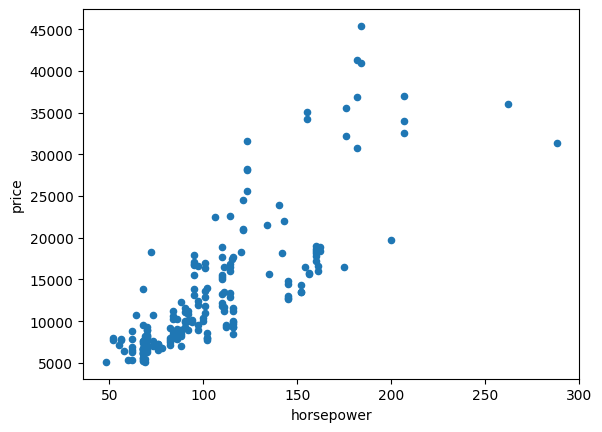

In [10]:
df.plot(kind='scatter',x = 'horsepower', y ='price')

<AxesSubplot:xlabel='citympg', ylabel='price'>

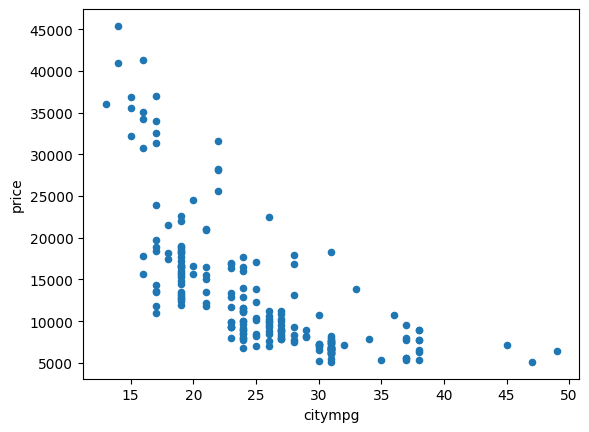

In [11]:
df.plot(kind='scatter',x = 'citympg', y ='price')

<AxesSubplot:xlabel='highwaympg', ylabel='price'>

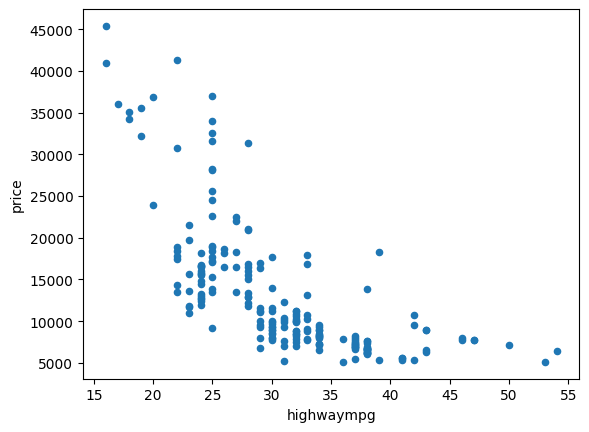

In [12]:
df.plot(kind='scatter',x = 'highwaympg', y ='price')

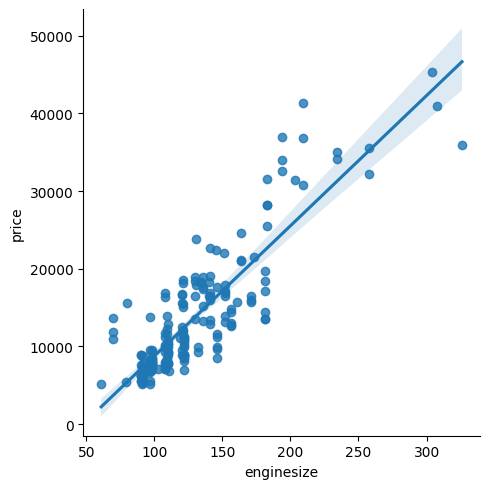

In [13]:
sns.lmplot(data = df, x = 'enginesize',y = 'price')

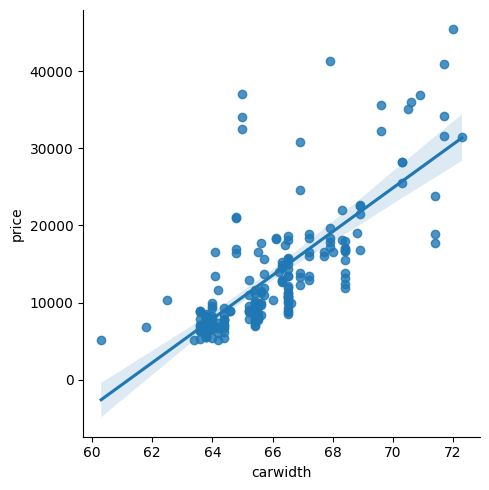

In [14]:
sns.lmplot(data = df, x = 'carwidth',y = 'price')

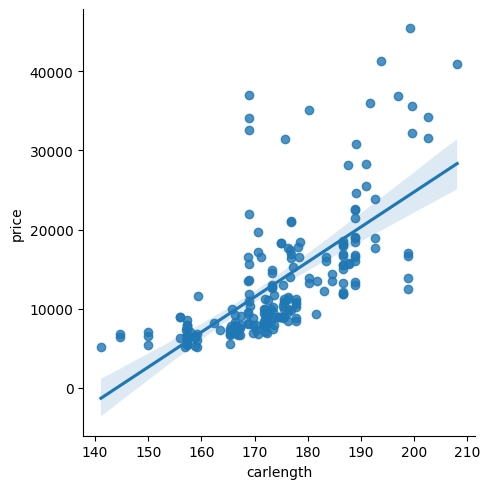

In [15]:
sns.lmplot(data = df, x = 'carlength',y = 'price')

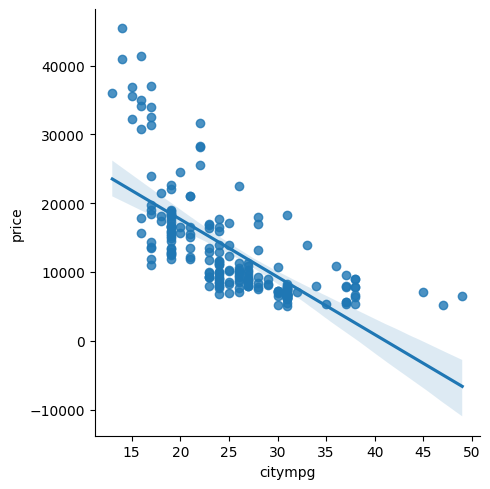

In [16]:
sns.lmplot(data = df, x = 'citympg',y = 'price')

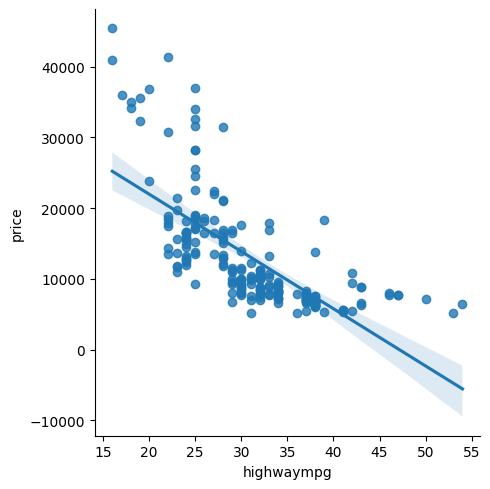

In [17]:
sns.lmplot(data = df, x = 'highwaympg',y = 'price')

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x = df[['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg']]
y = df['price']

In [20]:
x.shape

(205, 9)

In [21]:
y.shape

(205,)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 0, test_size=0.25)

In [23]:
x_train.shape

(153, 9)

In [24]:
x_test.shape

(52, 9)

In [25]:
y_train.shape

(153,)

In [26]:
y_test.shape

(52,)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lr = LinearRegression()

In [29]:
lr.fit(x_train,y_train)

LinearRegression()

In [30]:
y_pred = lr.predict(x_test)

In [31]:
from sklearn.metrics import mean_absolute_percentage_error

In [32]:
mean_absolute_percentage_error(y_test,y_pred)

0.2021317394904409

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
rf = RandomForestRegressor()

In [35]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [36]:
y_pred2 = rf.predict(x_test)

In [37]:
mean_absolute_percentage_error(y_test, y_pred2)

0.1285430642723777

In [38]:
from sklearn.metrics import r2_score

In [39]:
r2_score(y_test,y_pred)

0.8143882279378547

In [40]:
r2_score(y_test, y_pred2)

0.9101749609811021

In [41]:
#random forest regressor model has greater accuracy 

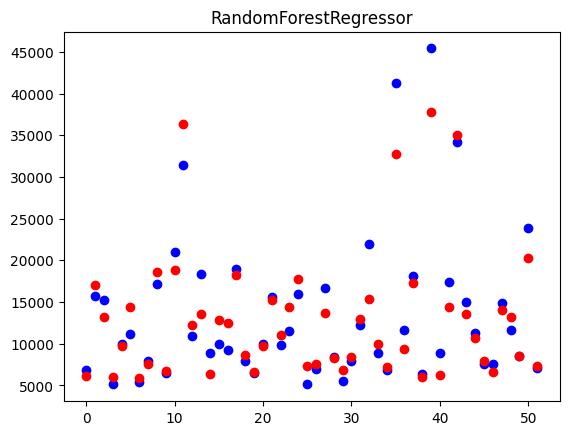

In [45]:
plt.scatter(range(len(y_test)), y_test, color='blue')
plt.scatter(range(len(y_pred2)), y_pred2, color='red')
plt.title('RandomForestRegressor')
plt.show()